## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [8]:
import os
import keras

import itertools

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
"""
建立神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            # x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x) 
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.7, 0.9, 0.95, 0.99]

In [13]:

"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
results = {}
for lr, momentum in itertools.product(LEARNING_RATE, MOMENTUM):
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f, Momentum = %.2f" % (lr, momentum))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=momentum)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s-momemtum-%s" % (str(lr), str(momentum))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000, Momentum = 0.70
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/5

50000/50000 [==============================] - 6s 129us/step - loss: 0.7750 - accuracy: 0.7206 - val_loss: 1.9607 - val_accuracy: 0.4741
Epoch 49/50
50000/50000 [==============================] - 7s 136us/step - loss: 0.7636 - accuracy: 0.7215 - val_loss: 2.1212 - val_accuracy: 0.4466
Epoch 50/50
50000/50000 [==============================] - 7s 134us/step - loss: 0.7715 - accuracy: 0.7201 - val_loss: 1.8170 - val_accuracy: 0.4912
Experiment with LR = 0.100000, Momentum = 0.90
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_______________________________________

50000/50000 [==============================] - 11s 224us/step - loss: 1.1957 - accuracy: 0.5705 - val_loss: 1.6210 - val_accuracy: 0.4450
Epoch 46/50
50000/50000 [==============================] - 11s 212us/step - loss: 1.1950 - accuracy: 0.5709 - val_loss: 1.6544 - val_accuracy: 0.4679
Epoch 47/50
50000/50000 [==============================] - 13s 250us/step - loss: 1.1751 - accuracy: 0.5771 - val_loss: 1.5879 - val_accuracy: 0.4734
Epoch 48/50
50000/50000 [==============================] - 12s 246us/step - loss: 1.1717 - accuracy: 0.5800 - val_loss: 1.6577 - val_accuracy: 0.4664
Epoch 49/50
50000/50000 [==============================] - 12s 243us/step - loss: 1.1643 - accuracy: 0.5801 - val_loss: 1.6093 - val_accuracy: 0.4787
Epoch 50/50
50000/50000 [==============================] - 12s 243us/step - loss: 1.1639 - accuracy: 0.5818 - val_loss: 1.6910 - val_accuracy: 0.4625
Experiment with LR = 0.100000, Momentum = 0.95
Model: "model_1"
________________________________________________

50000/50000 [==============================] - 12s 234us/step - loss: 1.5373 - accuracy: 0.4565 - val_loss: 1.6503 - val_accuracy: 0.4213
Epoch 43/50
50000/50000 [==============================] - 12s 231us/step - loss: 1.5431 - accuracy: 0.4535 - val_loss: 1.7258 - val_accuracy: 0.4059
Epoch 44/50
50000/50000 [==============================] - 11s 229us/step - loss: 1.5351 - accuracy: 0.4576 - val_loss: 1.7007 - val_accuracy: 0.4007
Epoch 45/50
50000/50000 [==============================] - 12s 237us/step - loss: 1.5266 - accuracy: 0.4613 - val_loss: 1.6362 - val_accuracy: 0.4227
Epoch 46/50
50000/50000 [==============================] - 12s 244us/step - loss: 1.5258 - accuracy: 0.4598 - val_loss: 1.6729 - val_accuracy: 0.3991
Epoch 47/50
50000/50000 [==============================] - 14s 276us/step - loss: 1.5217 - accuracy: 0.4619 - val_loss: 1.6745 - val_accuracy: 0.4163
Epoch 48/50
50000/50000 [==============================] - 13s 268us/step - loss: 1.5136 - accuracy: 0.4644 - va

50000/50000 [==============================] - 11s 212us/step - loss: 2.3081 - accuracy: 0.0985 - val_loss: 2.3044 - val_accuracy: 0.1000
Epoch 40/50
50000/50000 [==============================] - 12s 235us/step - loss: 2.3077 - accuracy: 0.1010 - val_loss: 2.3068 - val_accuracy: 0.1000
Epoch 41/50
50000/50000 [==============================] - 10s 207us/step - loss: 2.3067 - accuracy: 0.0979 - val_loss: 2.3055 - val_accuracy: 0.1000
Epoch 42/50
50000/50000 [==============================] - 11s 223us/step - loss: 2.3074 - accuracy: 0.1018 - val_loss: 2.3083 - val_accuracy: 0.1000
Epoch 43/50
50000/50000 [==============================] - 12s 234us/step - loss: 2.3084 - accuracy: 0.0972 - val_loss: 2.3049 - val_accuracy: 0.1000
Epoch 44/50
50000/50000 [==============================] - 10s 192us/step - loss: 2.3063 - accuracy: 0.1005 - val_loss: 2.3077 - val_accuracy: 0.1000
Epoch 45/50
50000/50000 [==============================] - 12s 233us/step - loss: 2.3093 - accuracy: 0.0996 - va

50000/50000 [==============================] - 11s 226us/step - loss: 1.0061 - accuracy: 0.6486 - val_loss: 1.4612 - val_accuracy: 0.5054
Epoch 37/50
50000/50000 [==============================] - 11s 223us/step - loss: 0.9946 - accuracy: 0.6522 - val_loss: 1.4658 - val_accuracy: 0.5056
Epoch 38/50
50000/50000 [==============================] - 11s 227us/step - loss: 0.9812 - accuracy: 0.6572 - val_loss: 1.4336 - val_accuracy: 0.5145
Epoch 39/50
50000/50000 [==============================] - 11s 225us/step - loss: 0.9688 - accuracy: 0.6601 - val_loss: 1.5169 - val_accuracy: 0.4959
Epoch 40/50
50000/50000 [==============================] - 11s 225us/step - loss: 0.9586 - accuracy: 0.6639 - val_loss: 1.7735 - val_accuracy: 0.4418
Epoch 41/50
50000/50000 [==============================] - 11s 218us/step - loss: 0.9433 - accuracy: 0.6704 - val_loss: 1.5921 - val_accuracy: 0.4845
Epoch 42/50
50000/50000 [==============================] - 11s 224us/step - loss: 0.9358 - accuracy: 0.6723 - va

50000/50000 [==============================] - 11s 229us/step - loss: 0.7443 - accuracy: 0.7359 - val_loss: 1.5023 - val_accuracy: 0.5293
Epoch 34/50
50000/50000 [==============================] - 11s 221us/step - loss: 0.7294 - accuracy: 0.7416 - val_loss: 1.4797 - val_accuracy: 0.5415
Epoch 35/50
50000/50000 [==============================] - 11s 227us/step - loss: 0.7029 - accuracy: 0.7505 - val_loss: 1.6246 - val_accuracy: 0.5127
Epoch 36/50
50000/50000 [==============================] - 12s 239us/step - loss: 0.6845 - accuracy: 0.7567 - val_loss: 1.5005 - val_accuracy: 0.5449
Epoch 37/50
50000/50000 [==============================] - 12s 239us/step - loss: 0.6694 - accuracy: 0.7619 - val_loss: 1.5241 - val_accuracy: 0.5312
Epoch 38/50
50000/50000 [==============================] - 12s 239us/step - loss: 0.6433 - accuracy: 0.7706 - val_loss: 1.6581 - val_accuracy: 0.5236
Epoch 39/50
50000/50000 [==============================] - 12s 238us/step - loss: 0.6282 - accuracy: 0.7761 - va

ResourceExhaustedError:  OOM when allocating tensor with shape[3072,512] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator cpu
	 [[node mul_1 (defined at C:\Users\liv\anaconda3\envs\NLP_course\lib\site-packages\keras\backend\tensorflow_backend.py:3009) ]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.
 [Op:__inference_keras_scratch_graph_360581]

Function call stack:
keras_scratch_graph


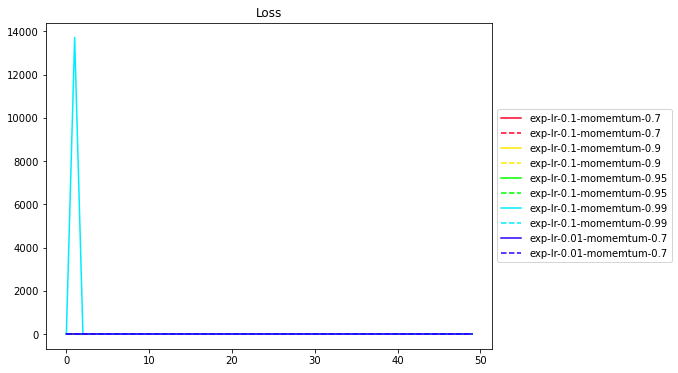

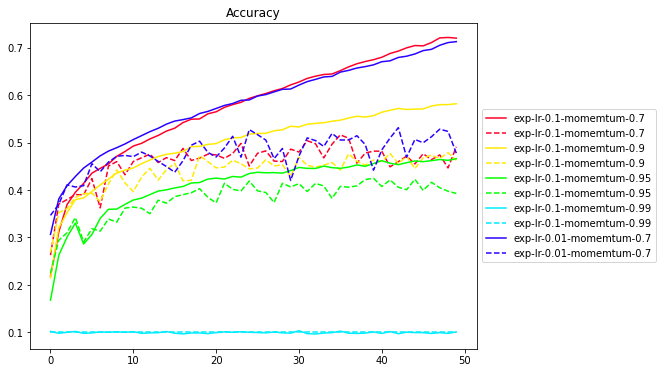

In [14]:

"""Code Here
將結果繪出
"""

import matplotlib.pyplot as plt
%matplotlib inline 
    
NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()